In [43]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#path=r'./NEU Metal Surface Defects Data' #for desktop

In [46]:
# # accessing data from colab
# from google.colab import drive
# drive.mount('/content/drive')

In [47]:
# folder path
path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

In [48]:
#exploring folder

In [49]:
os.listdir(path)

['Thumbs.db', 'train', 'test', 'valid']

In [50]:
os.listdir(path+'/train')

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']

In [51]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)
print(type(classes_defects))

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
<class 'list'>


In [52]:
os.listdir(path+'/train/Patches')[:10]

['Pa_206.bmp',
 'Pa_165.bmp',
 'Pa_145.bmp',
 'Pa_156.bmp',
 'Pa_226.bmp',
 'Pa_243.bmp',
 'Pa_209.bmp',
 'Pa_195.bmp',
 'Pa_131.bmp',
 'Pa_16.bmp']

In [53]:
from PIL import Image

In [54]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


In [55]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')


(200, 200)
max_pixel_value: 255


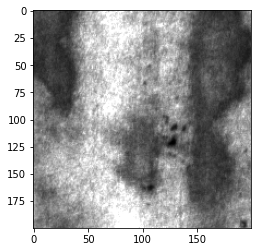

In [56]:
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

In [57]:
image_height=200
image_width=200
batch_size=16

In [58]:
#ImageDataGenerator and flow_from_directory for datasets

In [59]:
# # https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

# https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py

In [60]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32,
    
)

In [61]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 1667 images belonging to 6 classes.


In [62]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [63]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [64]:
# exploring datsets

In [65]:
import numpy as np

In [66]:
print(len(train_ds[0]))

2


In [67]:
print(len(train_ds[0][0]))

16


In [68]:
print(train_ds[0][0].shape)

(16, 200, 200, 3)


(16, 200, 200, 3)
3.0
['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
{'Inclusion': 0, 'Patches': 1, 'Crazing': 2, 'Pitted': 3, 'Scratches': 4, 'Rolled': 5}
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


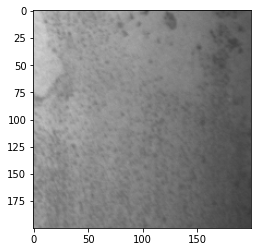

In [69]:
for images,labels in train_ds:
  plt.imshow(images[0],cmap='gray')
  print(images.shape)
  print(labels[0])
  labels=tf.cast(labels,tf.uint8)
  print(classes_defects)
  print(train_ds.class_indices)
  print((labels))
  print(classes_defects[labels[0]])
  break

In [70]:
#Pretrained models keras

In [71]:
# https://keras.io/api/applications/

In [72]:
# https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673

In [73]:
from tensorflow.keras.applications import ResNet50

In [74]:
feature_extractor=ResNet50(weights='imagenet',input_shape=(200,200,3))
feature_extractor.trainable=True

ValueError: ignored

In [75]:
feature_extractor=ResNet50(weights='imagenet',input_shape=(224,224,3))
feature_extractor.trainable=True


In [76]:
# feature_extractor=ResNet50(weights='imagenet',input_shape=(200,200,3),include_top=False)
# feature_extractor.trainable=False

In [77]:
data_aug=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           layers.experimental.preprocessing.Resizing(height=224,width=224),
                           layers.experimental.preprocessing.RandomContrast(factor=0.25),
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                           layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                           layers.experimental.preprocessing.RandomRotation(0.5),
                           layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [78]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [79]:
model=keras.Model(input_,output_)

In [80]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_4 (Dense)             (None, 128)               128128    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 6)                 198 

In [81]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [82]:
history=model.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 27s 204ms/step - loss: 1.7526 - accuracy: 0.4631 - val_loss: 1.7955 - val_accuracy: 0.1667
Epoch 2/50
105/105 [==============================] - 21s 198ms/step - loss: 1.6598 - accuracy: 0.6497 - val_loss: 1.8344 - val_accuracy: 0.1667
Epoch 3/50
105/105 [==============================] - 21s 197ms/step - loss: 1.5179 - accuracy: 0.6683 - val_loss: 1.9514 - val_accuracy: 0.1667
Epoch 4/50
105/105 [==============================] - 20s 194ms/step - loss: 1.3243 - accuracy: 0.6761 - val_loss: 2.0868 - val_accuracy: 0.1667
Epoch 5/50
105/105 [==============================] - 21s 198ms/step - loss: 1.0941 - accuracy: 0.7133 - val_loss: 2.5324 - val_accuracy: 0.1111
Epoch 6/50
105/105 [==============================] - 21s 197ms/step - loss: 1.0002 - accuracy: 0.6863 - val_loss: 2.7286 - val_accuracy: 0.1667
Epoch 7/50
105/105 [==============================] - 20s 194ms/step - loss: 0.9298 - accuracy: 0.6887 - val_loss: 2.8043 - val_ac

In [83]:
model.evaluate(test_ds)

5/5 [==============================] - 34s 9s/step - loss: 0.8583 - accuracy: 0.7500


[0.8582887649536133, 0.75]

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

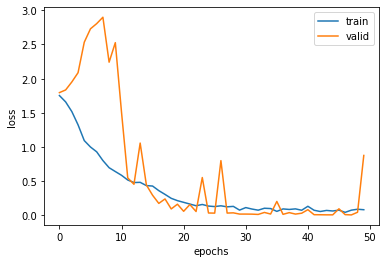

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

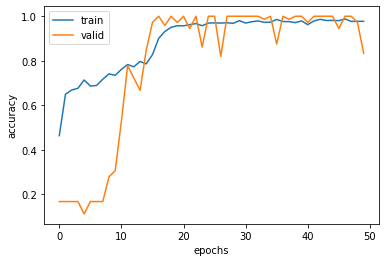

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

In [ ]:
model.evaluate(test_ds)